In [1]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2024-06-22 07:04:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

     0K .......... .......... .......... .......... ..........  0%  661K 6m6s
    50K .......... .......... .......... .......... ..........  0%  675K 6m2s
   100K .......... .......... .......... .......... ..........  0% 14.5M 4m7s
   150K .......... .......... .......... .......... ..........  0% 1.44M 3m46s
   200K .......... .......... .......... .......... ..........  0% 1.26M 3m38s
   250K .......... .......... .......... .......... ..........  0% 23.1M 3m4s
   300K .......... .......... .......... .......... ..........  0%  171M 2m38s
   350K .......... .......... .......... .......... ..........  0% 1.44M 2m38s
   400K .......... .......... .......... 

In [2]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 07:04:13--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

     0K ........                                              100% 30.5M=0s

2024-06-22 07:04:13 (30.5 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
CONFIDENCE = 0.6
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.4

labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [5]:
colors.shape

(81, 3)

In [6]:
# Load the YOLO Network
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

In [7]:
type(net)

cv2.dnn.Net

In [8]:
import os
image = cv2.imread('jungle.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename("jungle.jpg")
filename, ext = file_name.split(".")

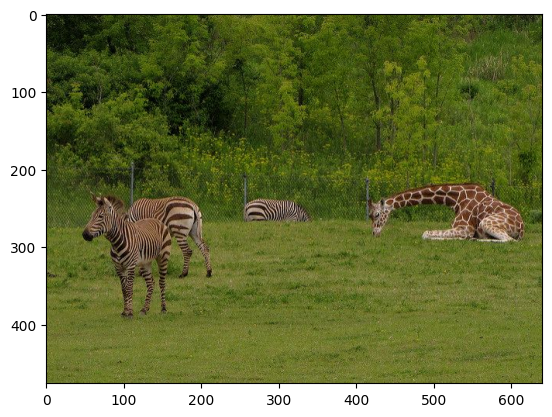

In [9]:
plt.imshow(image)

In [10]:
h, w = image.shape[:2]

# Create 4D Blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False) # BGR converted to RGB with help of swapRB

In [11]:
blob

array([[[[0.04705882, 0.01960784, 0.06666667, ..., 0.1254902 ,
          0.07843138, 0.10980392],
         [0.00392157, 0.05882353, 0.08627451, ..., 0.07058824,
          0.07058824, 0.08235294],
         [0.01176471, 0.05098039, 0.05098039, ..., 0.02352941,
          0.10196079, 0.14901961],
         ...,
         [0.13725491, 0.15294118, 0.15294118, ..., 0.12941177,
          0.16078432, 0.13725491],
         [0.15294118, 0.16470589, 0.17254902, ..., 0.1882353 ,
          0.14901961, 0.15294118],
         [0.2       , 0.20392157, 0.21176471, ..., 0.1764706 ,
          0.17254902, 0.14509805]],

        [[0.16862746, 0.11372549, 0.18431373, ..., 0.3019608 ,
          0.27058825, 0.30980393],
         [0.10196079, 0.16862746, 0.2       , ..., 0.24313726,
          0.2627451 , 0.28627452],
         [0.11372549, 0.16470589, 0.14901961, ..., 0.1882353 ,
          0.29803923, 0.34901962],
         ...,
         [0.42745098, 0.4392157 , 0.44313726, ..., 0.42352942,
          0.46666667, 0.4

In [12]:
blob.shape

(1, 3, 416, 416)

In [13]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [14]:
len(ln)

254

In [15]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [16]:
# Sets the blob as the input of the network
net.setInput(blob)

# Get all the layer names
ln = net.getLayerNames()

try:
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
  # In case getUnconnectedOutLayers() returns 1D array when CUDA isn't available
  ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

layer_outputs = net.forward(ln)

In [17]:
layer_outputs

(array([[0.03155247, 0.04028403, 0.28403947, ..., 0.        , 0.        ,
         0.        ],
        [0.04219297, 0.0294946 , 0.23797372, ..., 0.        , 0.        ,
         0.        ],
        [0.03956942, 0.03125083, 0.8829473 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9573964 , 0.95129865, 0.49436393, ..., 0.        , 0.        ,
         0.        ],
        [0.9560443 , 0.9671822 , 0.32762206, ..., 0.        , 0.        ,
         0.        ],
        [0.9637412 , 0.9515038 , 0.78527254, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02102786, 0.01836234, 0.05919967, ..., 0.        , 0.        ,
         0.        ],
        [0.01356249, 0.01778921, 0.297508  , ..., 0.        , 0.        ,
         0.        ],
        [0.02029595, 0.01704775, 0.08835562, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96978503, 0.9751966 , 0.04962498, ..., 0.        , 0.        ,
         0.        

In [18]:
layer_outputsfont_scale = 0.2
thickness = 2
boxes, confidences, class_ids = [], [], []

# loop over each of the layer outputs
for output in layer_outputs:
  # loop over each of the object detection
  for detection in output:
    # Extract the class ID (label) and confidence (i.e., probability) of the current object detection
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]

    # Filter out weak predictions by ensuring the detected probability is greater than the minimum probability
    if confidence > CONFIDENCE:
      # Scale the bounding box coordinates back relative to the size of the image, keeping in mind that YOLO actually returns the center (x,y) coordinate of the bounding box by the boxes 'width and height'
      box = detection[0:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype("int")

      # Use the center (x, y)-coordinates to derive the top and and left corner of the bounding box
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      # Update the list of bounding box coordinates, confidence, and class IDs
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [19]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [20]:
class_ids

[23, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22]

In [21]:
# # getting unique value of class ids

# class_ids = np.array(class_ids)
# class_ids = np.unique(class_ids)
# print(class_ids)

# for i in class_ids:
#   print(labels[i+1]) # i+1 bcz indexing starts from 1

In [22]:
# For all bounding boxes, we need to do the following:

# # Loop over the indexes we are keepingTh

# for i in range(len(boxes)):
#   # Extract the bounding box coordinates

#   x, y = boxes[i][0], boxes[i][1]
#   w, h = boxes[i][2], boxes[i][3]

#   # Draw a bounding box rectangle and label on the image
#   color = [int(c) for c in colors[class_ids[i]]]
#   cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness = 2)
#   text = f"{labels[class_ids[i]+1]}: {confidences[i]:.2f}" # +1 bcz of '__background__' in labels but actual indexing is from 0

#   # Calculate text width & height to draw the transparent boxes as background of the text
#   (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.4, thickness=2)[0]
#   text_offset_x = x
#   text_offset_y = y - 5
#   box_cords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
#   overlay = image.copy() # Shallow Copy
#   cv2.rectangle(overlay, box_cords[0], box_cords[1], color=color, thickness=cv2.FILLED)

#   # Adding Opacity using addWeighted()
#   image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)

#   # Now put the text (label: confidence%)
#   cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (255, 255, 255), thickness=2)

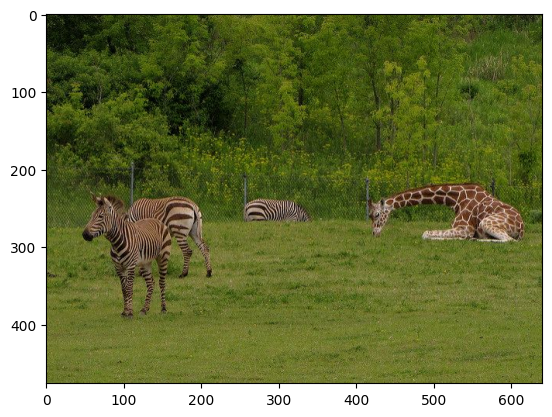

In [23]:
plt.imshow(image)

In [24]:
# Apply Non-Max Suppression to suppress weak and overlapping bounding boxes

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [25]:
indexes

array([11,  6,  2,  0], dtype=int32)

In [26]:
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label  = str(labels[class_ids[i]+1])
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness = 2)
    cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (255, 255, 255), thickness=2)

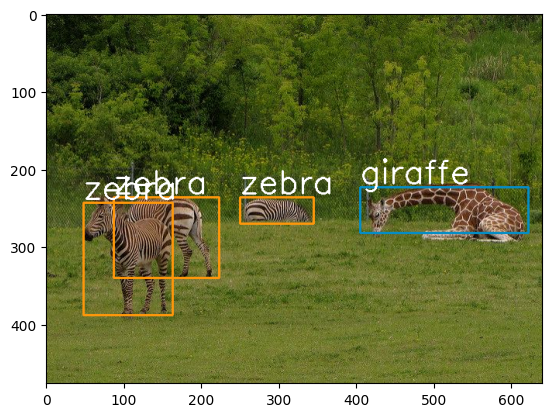

In [27]:
plt.imshow(image)